<a href="https://colab.research.google.com/github/Difnandes/Pandas-IO-/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_m = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [3]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [6]:
frames = [nomes_f, nomes_m]

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
81,LUAN
196,IVONETE
23,LARISSA
164,MARISA
148,APARECIDO


#Incluindo ID dos alunos

In [8]:
import numpy as np
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

400

In [10]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


#Criando a tabela cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import html5lib

In [18]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
type(cursos)

list

In [20]:
cursos = cursos[0]   

In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [23]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [24]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [25]:
cursos['id'] = cursos.index + 1

In [26]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [27]:
cursos = cursos.set_index('id')

In [28]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


#Matriculando os alunos nos cursos

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
105,PABLO,141,@dominiodoemail.com.br,pablo@dominiodoemail.com.br
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [31]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominiodoemail.com.br,leticia@dominiodoemail.com.br,2
157,JAIME,214,@servicodoemail.com,jaime@servicodoemail.com,1
36,ROBERTO,364,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,2
91,CELIA,367,@dominiodoemail.com.br,celia@dominiodoemail.com.br,2
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,1


In [33]:
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


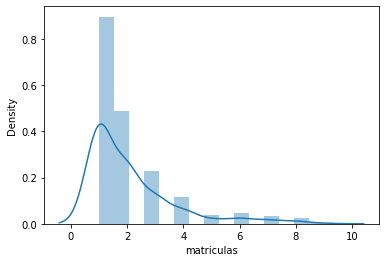

In [35]:
sns.distplot(nomes.matriculas)

In [36]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [37]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,7
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,3
132,GABRIELE,72,@dominiodoemail.com.br,gabriele@dominiodoemail.com.br,6
110,LUCIENE,22,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,1


#Selecionando cursos

In [38]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,@servicodoemail.com,bruna@servicodoemail.com,1
76,CRISTIANO,154,@servicodoemail.com,cristiano@servicodoemail.com,3
4,CARLOS,230,@servicodoemail.com,carlos@servicodoemail.com,1
11,GABRIEL,219,@servicodoemail.com,gabriel@servicodoemail.com,2
82,SOLANGE,7,@dominiodoemail.com.br,solange@dominiodoemail.com.br,2


In [39]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [40]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [41]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

# valores aleatórios

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [42]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
80,TAIS,179,@dominiodoemail.com.br,tais@dominiodoemail.com.br,1
116,MARCELA,261,@servicodoemail.com,marcela@servicodoemail.com,2
91,WESLEY,255,@dominiodoemail.com.br,wesley@dominiodoemail.com.br,1


In [43]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [44]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [45]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [46]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python


#Saída em diferentes formatos

In [47]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web


In [48]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [49]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,94,Lógica de programação
1,65,Java para Web
2,57,C# para Web
3,51,Ruby on Rails
4,6,Cursos de Python
5,32,PHP com MySql
6,11,.NET para web
7,59,Novas integrações com Java
8,8,TDD com Java
9,48,Código limpo com C#


In [50]:
matriculas_json = matriculas_por_curso.to_json()           #transformando csv em json

In [51]:
matriculas_json

'{"quantidade_de_alunos":{"1":94,"2":65,"3":57,"4":51,"5":6,"6":32,"7":11,"8":59,"9":8,"10":48,"11":23,"12":37,"13":8,"14":47,"15":70,"16":21,"17":7,"18":92,"19":45,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [52]:
matriculas_html = matriculas_por_curso.to_html()

In [53]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>94</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>65</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8</td>
  

#Criando o banco sql

In [54]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [56]:
engine = create_engine('sqlite:///:memory:')

In [57]:
engine

Engine(sqlite:///:memory:)

In [58]:
type(engine)

sqlalchemy.engine.base.Engine

In [59]:
matriculas_por_curso.to_sql('matriculas', engine)

In [60]:
inspector = inspect(engine) # criando um Inspector object

In [61]:
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


#Buscando do banco sql

In [62]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [63]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,6,Cursos de Python
1,7,11,.NET para web
2,9,8,TDD com Java
3,13,8,Persistência com .NET
4,17,7,Internet das coisas


In [64]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [65]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [66]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [67]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [68]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


#Escrevendo no banco

In [69]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [70]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nomes dos alunos e alunas da próxima turma

In [71]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [72]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [73]:
id_curso = 15
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
2,235,15
18,174,15
20,218,15
48,242,15
54,172,15
...,...,...
735,147,15
767,136,15
769,136,15
772,385,15


In [74]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
166,KELLY,109,@dominiodoemail.com.br,kelly@dominiodoemail.com.br,3
66,DANILO,348,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,6
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,6


In [75]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,15,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,9
17,15,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,2
20,15,BENEDITA,@dominiodoemail.com.br,benedita@dominiodoemail.com.br,2
25,15,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,2
50,15,LUCIANE,@dominiodoemail.com.br,luciane@dominiodoemail.com.br,1
...,...,...,...,...,...
364,15,ROBERTO,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,2
372,15,ELIANA,@servicodoemail.com,eliana@servicodoemail.com,2
385,15,MICHEL,@servicodoemail.com,michel@servicodoemail.com,3


In [76]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3      VALDEMIR
17      WILLIAN
20     BENEDITA
25      DANIELE
50      LUCIANE
         ...   
364     ROBERTO
372      ELIANA
385      MICHEL
390      MARCOS
391      RAQUEL
Name: nome, Length: 70, dtype: object

In [77]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
3,VALDEMIR
17,WILLIAN
20,BENEDITA
25,DANIELE
50,LUCIANE
...,...
364,ROBERTO
372,ELIANA
385,MICHEL


In [78]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Análise de dados
Name: 15, dtype: object

In [79]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Análise de dados'

In [80]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [81]:
proxima_turma

,nome
id_aluno,
3,VALDEMIR
17,WILLIAN
20,BENEDITA
25,DANIELE
50,LUCIANE
...,...
364,ROBERTO
372,ELIANA
385,MICHEL


In [82]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [83]:
proxima_turma.sample(5)

,Alunos do curso de Análise de dados
id_aluno,
250,ELIZANGELA
344,JAIR
104,MILTON
134,GILSON
336,RICARDO


#Excel

In [84]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [85]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Análise de dados
0,VALDEMIR
1,WILLIAN
2,BENEDITA
3,DANIELE
4,LUCIANE
...,...
65,ROBERTO
66,ELIANA
67,MICHEL
68,MARCOS
